In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
brfss = pd.read_hdf('brfss.hdf5', 'brfss')
height = brfss['HTM4'] # CM 단위 키
weight = brfss['WTKG3'] # KG 단위 체중 

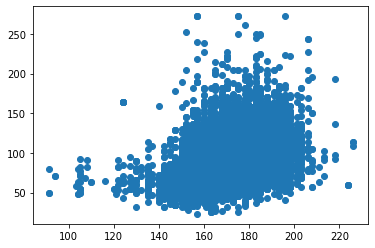

In [3]:
plt.scatter(height , weight)
plt.show()

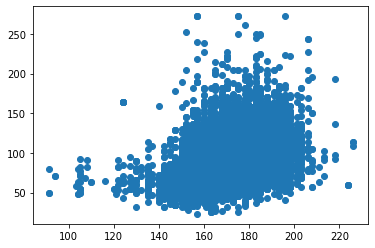

In [4]:
# scatter plot은 구현 속도가 상대적으로 떨어짐 
# plot과 marker를 이용해 빠르게 구현 

plt.plot(height, weight, 'o')
plt.show()

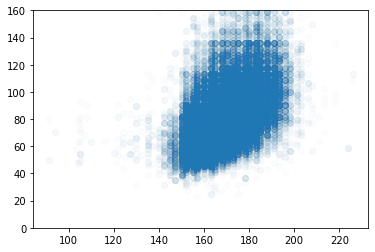

In [5]:
# alpha 투명도
plt.plot(height, weight, 'o' , alpha = 0.02)
plt.ylim(0,160)
plt.show()

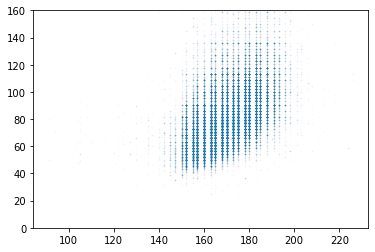

In [6]:
# makersize  산점도 포화 정도 
plt.plot(height, weight, 'o' , alpha = 0.02, markersize = 1)
plt.ylim(0,160)
plt.show()

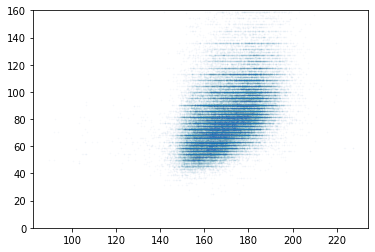

In [7]:
# "Jittering" is adding a bit of random noise to scatterplots, to better see the information contained in the data
#,usually when there is a lot of overplotting.

#  jittering - > 노이즈 생성 평균0 , 표준편차 2 
# 열이 사라졌지만 체중을 반올림한 행이 있다.
height_jitter = height + np.random.normal(0,2 , size = len(brfss))
plt.plot(height_jitter, weight, 'o', markersize = 1, alpha = 0.02)
plt.ylim(0,160)
plt.show()

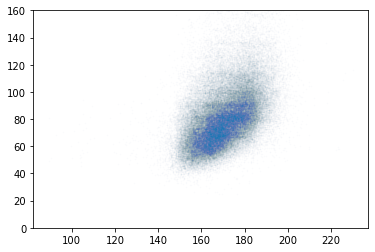

In [8]:
# More jittering 
height_jitter = height + np.random.normal(0,2 , size = len(brfss))
weight_jitter = weight + np.random.normal(0,2 , size = len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize = 1, alpha = 0.01)
plt.ylim(0,160)
plt.show()

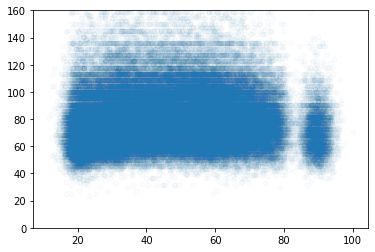

In [9]:
# weight and age
age = brfss['AGE'] + np.random.normal(0,2.5, size  = len(brfss) ) 
weight = brfss['WTKG3']
plt.plot(age, weight , 'o', markersize  = 5,  alpha = 0.02)
plt.ylim(0,160)
plt.show()

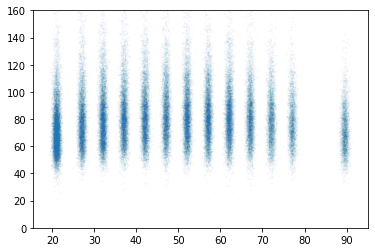

In [10]:
age = brfss['AGE'] + np.random.normal(0,0.5, size  = len(brfss) ) 
weight = brfss['WTKG3'] + np.random.normal(0,2, size  = len(brfss) ) 
plt.plot(age, weight , 'o', markersize  = 1,  alpha = 0.02)
plt.ylim(0,160)
plt.show()

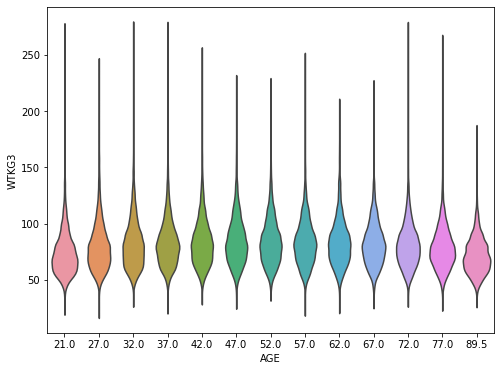

In [11]:
# violin plot 
# 체중 분포 
d =  brfss.dropna(subset = ['AGE','WTKG3'])

fig, ax = plt.subplots(figsize = (8,6))

sns.violinplot(x = 'AGE', y = 'WTKG3', data = d, inner = None ,ax = ax )  # Using None will draw unadorned violins.
plt.show()

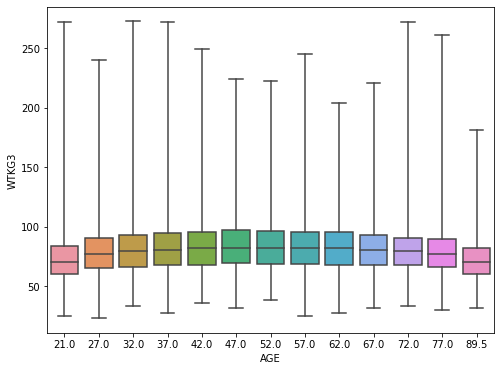

In [12]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(x = 'AGE', y = 'WTKG3', data = d, whis = 10, ax = ax)   # 가상의 선을 어떻게 그을 것인가에 대한 값

plt.show()

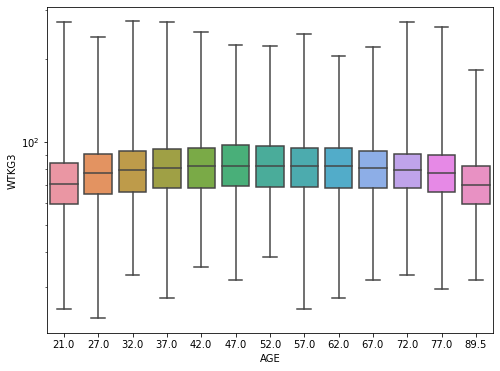

In [13]:
# 높은 값으로 치우친 데이터의 경우 로그 스케일로 보는것이 유용 

fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(x = 'AGE', y = 'WTKG3', data = d, whis = 10, ax = ax)   # 가상의 선을 어떻게 그을 것인가에 대한 값

plt.yscale('log')
plt.show()

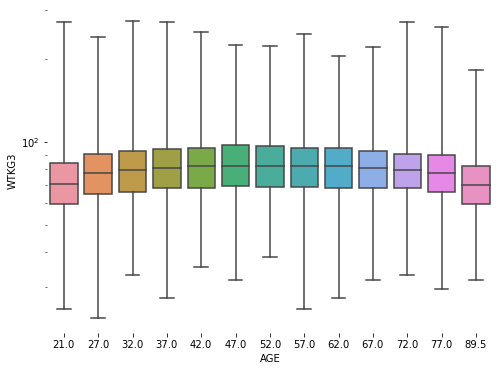

In [14]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(x = 'AGE', y = 'WTKG3', data = d, whis = 10, ax = ax)   
plt.yscale('log')
sns.despine(left=True, bottom=True) # Remove the top and right spines from plot
plt.show()

In [15]:
# 상관관계 
# 통계에서 일반적은 Pearson 상관계수 의미 , -1 ~ 1사이 변수 간 선형관계의 강도를 정량화
# 관계가 비선형인 경우 상관관계는 과소평가 
col  = ["HTM4", "WTKG3", "AGE"]
s = brfss[col]

In [16]:
# 상관행렬 
s.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


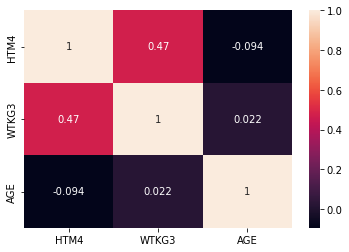

In [17]:
sns.heatmap(s.corr() , annot = True)
plt.show()

In [18]:
# 선의 기울기 파악 
from scipy.stats import linregress 

In [19]:
# linregress 는 NaN을 처리할 수 없으므로 NaN 미리제거 필요 
s = brfss.dropna(subset = ["WTKG3","HTM4"])

In [20]:
xs = s["HTM4"] # 독립변수
ys = s["WTKG3"] # 종속변수 
r = linregress(xs, ys)
r   # slope 기울기, intercept 절편 , rvalue 설명력,  p값 ,  표준편차

LinregressResult(slope=0.9192115381848256, intercept=-75.12704250330165, rvalue=0.47420308979024434, pvalue=0.0, stderr=0.005632863769802997, intercept_stderr=0.960886026543318)

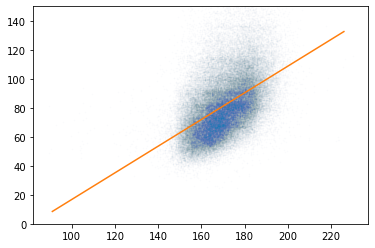

In [21]:
# Regression lines
fx = np.array([xs.min(), xs.max()])
fy = r.intercept + r.slope  * fx
plt.plot(height_jitter, weight_jitter, 'o', markersize = 1, alpha = 0.01)
plt.plot(fx, fy, '-')
plt.ylim(0,150)
plt.show()

In [22]:
# Multiple regresssion
import statsmodels.formula.api as smf 

results = smf.ols('INCOME2 ~ _VEGESU1', data = brfss ).fit() # Ordinary Least Squares(ols)는 보통최소제곱 
results.params # 기울기와 절편을 포함한 값 출력  

Intercept    5.450700
_VEGESU1     0.204935
dtype: float64

In [23]:
# 분석에 대한 요약 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                INCOME2   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1096.
Date:                Tue, 28 Dec 2021   Prob (F-statistic):          1.38e-238
Time:                        23:45:03   Log-Likelihood:            -1.6629e+05
No. Observations:               75426   AIC:                         3.326e+05
Df Residuals:                   75424   BIC:                         3.326e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4507      0.014    378.233      0.000       5.422       5.479
_VEGESU1       0.2049      0.006     33.103      0.000       0.193       0.217
==============================================================================
Omnibus:                     7851.406   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8173.326
Skew:                          -0.754   Prob(JB):                         0.00
Kurtosis:                       2.427   Cond. No.                         4.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
gss = pd.read_hdf('gss.hdf5', 'gss' )
r = smf.ols('realinc ~  educ', data = gss).fit() # realinc는 예측하려는 변수 , educ는 예측을 알리는데 사용하는 변수
r.params

# 교육의 증가는 3600의 소득 증가와 관련 

Intercept   -11539.147837
educ          3586.523659
dtype: float64

In [25]:
# age 변수 추가 
r = smf.ols('realinc ~  educ + age ', data = gss).fit()
r.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

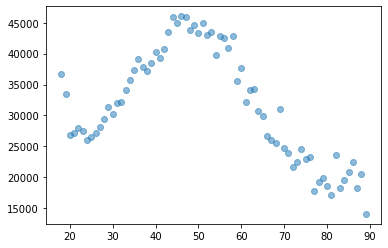

In [26]:
# 상관관계와 단순 회귀로는 비선형 관계 설명 불가
g = gss.groupby('age')
mean_income_by_age = g['realinc'].mean()

plt.plot(mean_income_by_age, 'o' , alpha = 0.5)
plt.show()

In [27]:
# 다중회귀 
# 두개 이상의 독립변수와 하나의 종속변수 관계 분석
gss['age2'] = gss['age']**2
r = smf.ols('realinc ~  educ + age + age2 ', data = gss).fit()
r.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

In [28]:
# modeling income and age
gss['educ2'] = gss['educ']**2

r = smf.ols('realinc ~  educ + educ2 + age + age2 ', data = gss).fit()
r.params

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64

In [29]:
# 회귀결과 객체는 모델을 사용하여 예측을 실행하는 predict() method 제공
# 데이터프레임을 매개변수로 사용하고 데이터프레임의 각행에 대한 예측과 함께 Series를 반환 

df = pd.DataFrame()
df['age'] = np.linspace(18, 85) # 18 ~ 85세 사이의 연령
df['age2'] = df['age']**2

df['educ'] = 12
df['educ2'] = df['educ']**2

In [30]:
pred12 = r.predict(df)
pred12

0     18422.699989
1     19864.036105
2     21241.067963
3     22553.795565
4     23802.218909
5     24986.337997
6     26106.152827
7     27161.663401
8     28152.869717
9     29079.771777
10    29942.369580
11    30740.663126
12    31474.652414
13    32144.337446
14    32749.718221
15    33290.794739
16    33767.567000
17    34180.035004
18    34528.198751
19    34812.058241
20    35031.613474
21    35186.864451
22    35277.811170
23    35304.453632
24    35266.791837
25    35164.825786
26    34998.555477
27    34767.980911
28    34473.102089
29    34113.919009
30    33690.431673
31    33202.640080
32    32650.544229
33    32034.144122
34    31353.439758
35    30608.431136
36    29799.118258
37    28925.501123
38    27987.579731
39    26985.354082
40    25918.824176
41    24787.990013
42    23592.851593
43    22333.408916
44    21009.661982
45    19621.610791
46    18169.255343
47    16652.595638
48    15071.631677
49    13426.363458
dtype: float64

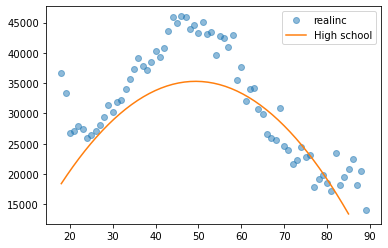

In [31]:
plt.plot(mean_income_by_age, 'o' , alpha = 0.5, label = 'realinc') # 각 연령대의 평균소득
plt.plot(df['age'], pred12 , label = 'High school') # 교육을 일정하게 유지하면서 모델에 의해 생성된 예측
plt.legend()
plt.show()

In [32]:
# Logistic regression
# 범주형 데이터 사용 
# statmodels 사용하여 회귀모델의 일부를 범주형 변수로 변환 '
# C는 범주형 변수임을 나타냄
r = smf.ols('realinc ~  educ + educ2 + age + age2 + C(sex)', data = gss).fit()
r.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

In [33]:
# 사람이 총을 사기전에 경찰 허가를 받아야하는 법 찬성 , 반대
gss['gunlaw'].value_counts()

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

In [34]:
# statmodels 사용하기 위해서 1 -> 긍정 , 0 -> 부정으로 변경 
gss['gunlaw'].replace([2],[0], inplace = True)

In [35]:
f = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
r = smf.logit(f, data = gss).fit()

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


In [36]:
r.params

Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

In [37]:
df['sex'] = 1 # 남성
pred1 = r.predict(df)

In [38]:
df['sex'] = 2 # 여성
pred2 = r.predict(df)

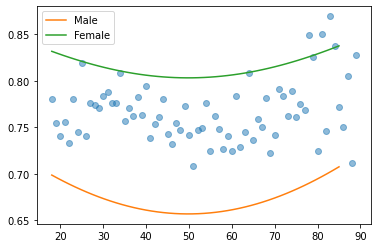

In [39]:
g = gss.groupby('age')
favor_by_age = g['gunlaw'].mean()

plt.plot(favor_by_age , 'o', alpha = 0.5)
plt.plot(df['age'], pred1 , label = 'Male')
plt.plot(df['age'], pred2, label = 'Female')
plt.legend()
plt.show()